# Amazon dataset:

In [1]:
#Load page1:
import pandas as pd
df=pd.read_csv("amazon_data.csv")
df1=df[["title","price","rating","reviews"]]
display(df1.head())

,title,price,rating,reviews
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,$35.98,4.2 out of 5 stars,"1,125 ratings"
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,$37.99,4.0 out of 5 stars,"1,419 ratings"
2,Levi's Women's New Boyfriend Jeans (Also Avail...,$39.99,4.2 out of 5 stars,"9,046 ratings"
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,$18.35,4.2 out of 5 stars,"28,264 ratings"
4,Gloria Vanderbilt Women's Amanda Capri Jean,$24.99,4.3 out of 5 stars,"4,770 ratings"


In [2]:
#load page2:
df=pd.read_csv("amazon_data1.csv")
df2=df[["title","price","rating","reviews"]]
display(df2.head())

,title,price,rating,reviews
0,No Nonsense Women's Classic Denim Capri Leggin...,$20.59,4.2 out of 5 stars,"14,694 ratings"
1,Lee Women's Flex Motion Regular Fit 5 Pocket C...,$29.90,4.3 out of 5 stars,"4,812 ratings"
2,luvamia Wide Leg Jeans for Women Trendy High W...,$26.14,4.3 out of 5 stars,513 ratings
3,Lee Women's Relaxed Fit Capri Jean,$29.90,4.3 out of 5 stars,"10,161 ratings"
4,Signature by Levi Strauss & Co. Gold Women's M...,$24.99,4.3 out of 5 stars,"31,561 ratings"


In [3]:
# Merge the datasets
amazon = pd.concat([df1, df2])
display(amazon.head())

,title,price,rating,reviews
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,$35.98,4.2 out of 5 stars,"1,125 ratings"
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,$37.99,4.0 out of 5 stars,"1,419 ratings"
2,Levi's Women's New Boyfriend Jeans (Also Avail...,$39.99,4.2 out of 5 stars,"9,046 ratings"
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,$18.35,4.2 out of 5 stars,"28,264 ratings"
4,Gloria Vanderbilt Women's Amanda Capri Jean,$24.99,4.3 out of 5 stars,"4,770 ratings"


In [4]:
#get info():
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 51
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    104 non-null    object
 1   price    103 non-null    object
 2   rating   104 non-null    object
 3   reviews  104 non-null    object
dtypes: object(4)
memory usage: 4.1+ KB


In [5]:
#null values
amazon.isnull().sum()

title      0
price      1
rating     0
reviews    0
dtype: int64

In [6]:
#drop null values:
amazon=amazon.dropna()

In [7]:
amazon.duplicated().sum()

4

In [8]:
amazon.drop_duplicates(inplace=True)

In [9]:
amazon.duplicated().sum()

0

In [10]:
# assume the exchange rate is 1 USD = 74.83 INR (Indian Rupees)
exchange_rate = 74.83

# create a function to convert dollars to rupees
def convert_dollars_to_rupees(dollars):
    return dollars * exchange_rate

# apply the function to the 'price' column
amazon['price'] = amazon['price'].apply(lambda x: convert_dollars_to_rupees(float(x.replace('$', '').replace('Rs', ''))))

# print the resulting DataFrame
display(amazon.head())

,title,price,rating,reviews
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,2692.3834,4.2 out of 5 stars,"1,125 ratings"
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,2842.7917,4.0 out of 5 stars,"1,419 ratings"
2,Levi's Women's New Boyfriend Jeans (Also Avail...,2992.4517,4.2 out of 5 stars,"9,046 ratings"
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,1373.1305,4.2 out of 5 stars,"28,264 ratings"
4,Gloria Vanderbilt Women's Amanda Capri Jean,1870.0017,4.3 out of 5 stars,"4,770 ratings"


In [11]:
amazon['rating'] = amazon['rating'].str.split(' out of 5 stars').str[0]
amazon['reviews'] = amazon['reviews'].str.split(' ratings').str[0]
display(amazon.head())

,title,price,rating,reviews
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,2692.3834,4.2,"1,125"
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,2842.7917,4.0,"1,419"
2,Levi's Women's New Boyfriend Jeans (Also Avail...,2992.4517,4.2,"9,046"
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,1373.1305,4.2,"28,264"
4,Gloria Vanderbilt Women's Amanda Capri Jean,1870.0017,4.3,"4,770"


In [12]:
amazon = amazon[["title","price","rating","reviews"]].rename(columns={"title": "product_name", "rating": "rating", "reviews": "reviews"})

In [13]:
display(amazon.head())

,product_name,price,rating,reviews
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,2692.3834,4.2,"1,125"
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,2842.7917,4.0,"1,419"
2,Levi's Women's New Boyfriend Jeans (Also Avail...,2992.4517,4.2,"9,046"
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,1373.1305,4.2,"28,264"
4,Gloria Vanderbilt Women's Amanda Capri Jean,1870.0017,4.3,"4,770"


# Myntra dataset:

In [14]:
#Load page:
import pandas as pd
myntra=pd.read_csv("myntra.csv")
myntra=myntra[["product_name","price","rating","review"]]
display(myntra.head())

,product_name,price,rating,review
0,SASSAFRAS Women Wide Leg Stretchable Jeans,Rs. 1319,4.2,4.2k
1,H&M Wide Ultra High Jeans,NaN,4.0,458
2,IVOC Women Grey Mid-Rise Cotton Cargos Trousers,Rs. 1399,4.3,1.6k
3,Chemistry Women Flared High-Rise Light Fade Jeans,Rs. 1101,3.7,1.8k
4,SASSAFRAS Women Blue Comfort Wide Leg High-Ris...,Rs. 839,4.1,7.3k


In [15]:
#get info():
myntra.isna().sum()

product_name    0
price           9
rating          1
review          0
dtype: int64

In [16]:
#drop null values:
myntra=myntra.dropna()
myntra.isna().sum()

product_name    0
price           0
rating          0
review          0
dtype: int64

In [17]:
myntra.duplicated().sum()

1

In [18]:
myntra.loc[myntra['review'].str.contains('k'), 'review'] = myntra['review'].str.replace('k', '').astype(float) * 1000
myntra['price'] = myntra['price'].str.replace('Rs. ', '').astype(float)
display(myntra)

,product_name,price,rating,review
0,SASSAFRAS Women Wide Leg Stretchable Jeans,1319.0,4.2,4200.0
2,IVOC Women Grey Mid-Rise Cotton Cargos Trousers,1399.0,4.3,1600.0
3,Chemistry Women Flared High-Rise Light Fade Jeans,1101.0,3.7,1800.0
4,SASSAFRAS Women Blue Comfort Wide Leg High-Ris...,839.0,4.1,7300.0
5,Levis Women Straight Fit High-Rise Light Fade ...,1499.0,4.3,2100.0
...,...,...,...,...
95,Levis Women Pure Cotton High Rise Wide Leg Mil...,1899.0,4.5,43
96,Roadster Women Black Skinny Fit Mid-Rise Clean...,758.0,3.9,133
97,IVOC Women Regular Fit cargo trouser,1399.0,4.3,4100.0
98,Kotty Women Blue Jean Stretchable Jeans,599.0,3.2,234


In [19]:
myntra = myntra[["product_name","price","rating","review"]].rename(columns={"review": "reviews"})

In [20]:
display(myntra.head())

,product_name,price,rating,reviews
0,SASSAFRAS Women Wide Leg Stretchable Jeans,1319.0,4.2,4200.0
2,IVOC Women Grey Mid-Rise Cotton Cargos Trousers,1399.0,4.3,1600.0
3,Chemistry Women Flared High-Rise Light Fade Jeans,1101.0,3.7,1800.0
4,SASSAFRAS Women Blue Comfort Wide Leg High-Ris...,839.0,4.1,7300.0
5,Levis Women Straight Fit High-Rise Light Fade ...,1499.0,4.3,2100.0


# Ajio dataset:

In [21]:
#Load page:
import pandas as pd
ajio=pd.read_csv("ajio.csv")
ajio=ajio[["product_name","price","rating","reviews"]]
display(ajio.head())

,product_name,price,rating,reviews
0,Women High-Rise Wide Jeans,₹998,4.0,2
1,High-Rise Bootcut Jeans,₹560,3.3,2.1K
2,Women High-Rise Wide Jeans,₹998,4.0,2
3,Women Washed Flared Jeans,₹900,3.6,353
4,Women Regular Fit Straight Jeans with Insert P...,"₹1,079",3.5,413


In [22]:
#get info():
ajio.isna().sum()

product_name     0
price            0
rating          10
reviews         10
dtype: int64

In [23]:
#drop null values:
ajio=ajio.dropna()
ajio.isna().sum()

product_name    0
price           0
rating          0
reviews         0
dtype: int64

In [24]:
ajio.duplicated().sum()

3

In [25]:
ajio.drop_duplicates(inplace=True)

In [26]:
ajio.duplicated().sum()

0

In [27]:
ajio['price'] = pd.to_numeric(ajio['price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
ajio.loc[ajio['reviews'].str.contains('k', case=False), 'reviews'] = ajio['reviews'].str.replace('k', '', case=False).str.replace(',', '').astype(float) * 1000
display(ajio.head())

,product_name,price,rating,reviews
0,Women High-Rise Wide Jeans,998,4.0,2
1,High-Rise Bootcut Jeans,560,3.3,2100.0
3,Women Washed Flared Jeans,900,3.6,353
4,Women Regular Fit Straight Jeans with Insert P...,1079,3.5,413
5,Women Heavily-Washed Relaxed Fit Joggers,998,3.1,10


# Shopsy:

In [28]:
#Load page:
import pandas as pd
shopsy=pd.read_csv("shopsy.csv")
shopsy=shopsy[["Product Name","Discounted Price","Rating Count","Review Count"]]
display(shopsy.head())

,Product Name,Discounted Price,Rating Count,Review Count
0,Jogger Fit Women Blue Jeans,₹264,-5,-253
1,Boot-Leg Women Black Jeans,NaN,-47,-426
2,Regular Women Black Jeans,₹484,-39,-13
3,Jogger Fit Women Light Blue Jeans,₹484,-89,-3
4,Skinny Women Light Blue Jeans,₹584,-51,-15


In [29]:
#get info():
shopsy.isna().sum()

Product Name         0
Discounted Price    10
Rating Count        10
Review Count        11
dtype: int64

In [30]:
#drop null values:
shopsy=shopsy.dropna()
shopsy.isna().sum()

Product Name        0
Discounted Price    0
Rating Count        0
Review Count        0
dtype: int64

In [31]:
shopsy.duplicated().sum()

8

In [32]:
shopsy.drop_duplicates(inplace=True)

In [33]:
shopsy.duplicated().sum()

0

In [34]:
shopsy['Discounted Price'] = pd.to_numeric(shopsy['Discounted Price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

In [35]:
shopsy['Rating Count'] = shopsy['Rating Count'].str.replace('-', '').str.replace(',', '').astype(int)
shopsy['Review Count'] = shopsy['Review Count'].str.replace('-', '').str.replace(',', '').astype(int)

In [36]:
display(shopsy.head())

,Product Name,Discounted Price,Rating Count,Review Count
0,Jogger Fit Women Blue Jeans,264,5,253
2,Regular Women Black Jeans,484,39,13
3,Jogger Fit Women Light Blue Jeans,484,89,3
4,Skinny Women Light Blue Jeans,584,51,15
5,Skinny Women Black Jeans,410,38,168


In [37]:
shopsy = shopsy.rename(columns={"Product Name": "product_name", "Discounted Price": "price", "Rating Count": "rating", "Review Count": "reviews"})

In [38]:
display(shopsy.head())

,product_name,price,rating,reviews
0,Jogger Fit Women Blue Jeans,264,5,253
2,Regular Women Black Jeans,484,39,13
3,Jogger Fit Women Light Blue Jeans,484,89,3
4,Skinny Women Light Blue Jeans,584,51,15
5,Skinny Women Black Jeans,410,38,168


# Freakins dataset:

In [39]:
#Load page:
import pandas as pd
rating=pd.read_csv("freak.csv")
reviews=pd.read_csv("reviews.csv")
rating=rating[["product_name","Price","ratings"]]
rating = rating[["product_name","Price","ratings"]].rename(columns={"product_name": "product_name", "ratings": "rating", "Price": "price"})
freakins = pd.merge(rating, reviews, on='price')
display(freakins.head())

,product_name,price,rating,reviews
0,DARK BLUE HIGH WAIST SKINNY JEANS,1499,4.72,172
1,BLACK MOM HIGH ANKLE JEANS,1500,4.76,47
2,90'S BASIC BLUE STRAIGHT JEANS,1501,4.49,117
3,BLACK SLOUCHY JEANS,1502,4.75,192
4,MURKY CARGO JEANS,1503,4.76,323


In [40]:
#get info():
freakins.isna().sum()

product_name    0
price           0
rating          0
reviews         0
dtype: int64

In [41]:
freakins.duplicated().sum()

0

# Merged Dataset for analysis:

In [42]:
merged_df = pd.concat([amazon, myntra], ignore_index=True)

merged_df = pd.concat([merged_df, ajio], ignore_index=True)

merged_df = pd.concat([merged_df, shopsy], ignore_index=True)

merged_df = pd.concat([merged_df, freakins], ignore_index=True)

display(merged_df)

,product_name,price,rating,reviews
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,2692.3834,4.2,"1,125"
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,2842.7917,4.0,"1,419"
2,Levi's Women's New Boyfriend Jeans (Also Avail...,2992.4517,4.2,"9,046"
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,1373.1305,4.2,"28,264"
4,Gloria Vanderbilt Women's Amanda Capri Jean,1870.0017,4.3,"4,770"
...,...,...,...,...
433,VINTAGE SKY DISTRESS BOOTCUT JEANS,1594.0000,4.3,99
434,INDIGO ELASTICATED DISTRESS MOM JEANS,1595.0000,4.67,53
435,WHITE BOOTCUT JEANS,1596.0000,5.0,396
436,BISQUE CARGO JEANS,1597.0000,4.9,121


In [43]:
merged_df.duplicated().sum()

1

In [44]:
merged_df.drop_duplicates(inplace=True)

In [45]:
merged_df.duplicated().sum()

0

In [46]:
merged_df.isnull().sum()

product_name    0
price           0
rating          0
reviews         0
dtype: int64

In [47]:
import pandas as pd
# Convert the 'reviews' column to string type if it's not already
merged_df['reviews'] = merged_df['reviews'].astype(str)

In [48]:
# Clean the 'reviews' column by removing non-numeric characters
merged_df['reviews'] = merged_df['reviews'].str.replace(r'[^0-9]', '', regex=True)

In [49]:
# Convert the 'reviews' column to numeric, handling NaN values
merged_df['reviews'] = pd.to_numeric(merged_df['reviews'], errors='coerce').fillna(0).astype(int)

In [50]:
# Convert the 'rating' column to numeric, handling NaN values
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')

In [51]:
# Handle any potential NaN values in 'rating' (e.g., fill with 0 or drop the rows)
merged_df['rating'].fillna(0, inplace=True)


In [52]:
# Now you can proceed with sorting and analyzing the data as before
df_sorted_by_rating = merged_df.sort_values(by='rating', ascending=False)
df_sorted_by_reviews = merged_df.sort_values(by='reviews', ascending=False)


In [53]:
# Find top 5 jeans by reviews
top_5_by_reviews = df_sorted_by_reviews.head(5)

In [54]:
# Find top 5 jeans by reviews
top_5_by_rating = df_sorted_by_rating.head(5)

In [55]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Top 5 Jeans by Rating')

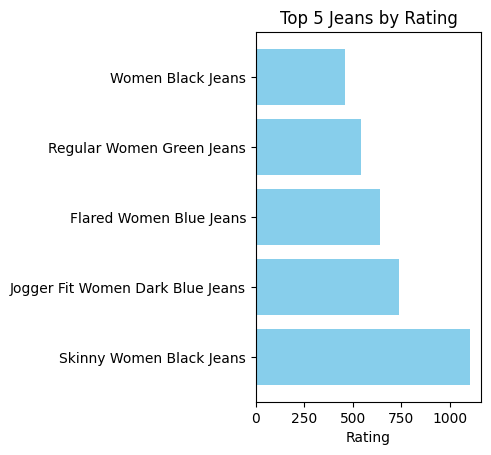

In [56]:
# Top 5 by Rating
plt.subplot(1, 2, 1)
plt.barh(top_5_by_rating['product_name'], top_5_by_rating['rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 5 Jeans by Rating')

Text(0.5, 1.0, 'Top 5 Jeans by Number of Reviews')

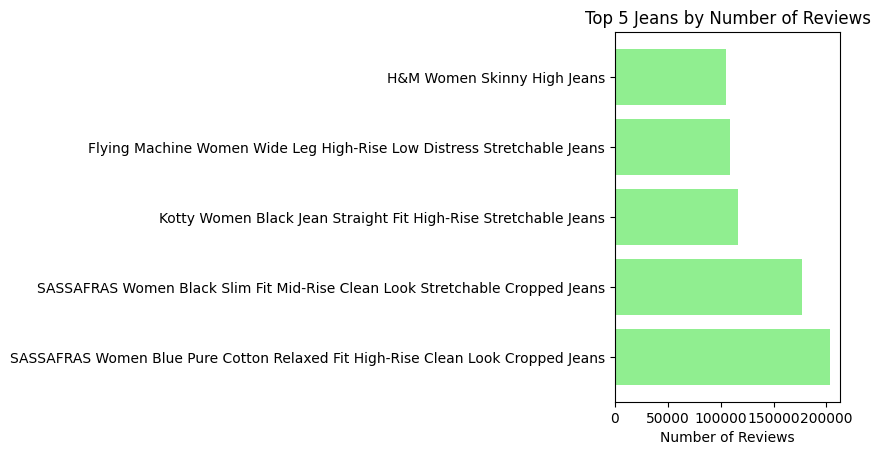

In [57]:
# Top 5 by Reviews
plt.subplot(1, 2, 2)
plt.barh(top_5_by_reviews['product_name'], top_5_by_reviews['reviews'], color='lightgreen')
plt.xlabel('Number of Reviews')
plt.title('Top 5 Jeans by Number of Reviews')

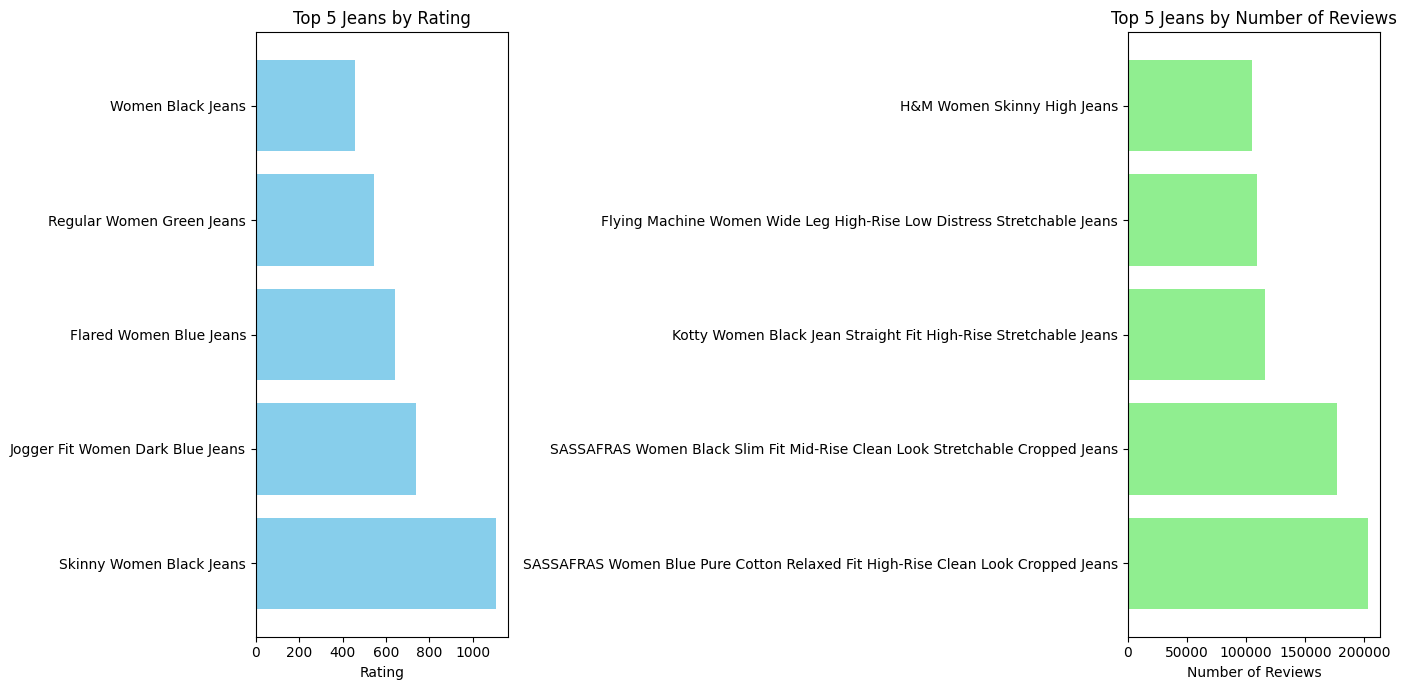

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
# Top 5 by Rating
plt.subplot(1, 2, 1)
plt.barh(top_5_by_rating['product_name'], top_5_by_rating['rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 5 Jeans by Rating')

# Top 5 by Reviews
plt.subplot(1, 2, 2)
plt.barh(top_5_by_reviews['product_name'], top_5_by_reviews['reviews'], color='lightgreen')
plt.xlabel('Number of Reviews')
plt.title('Top 5 Jeans by Number of Reviews')

plt.tight_layout()
plt.show()

In [59]:
# Ensure the 'price' column is numeric
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')

In [60]:
# Handle any potential NaN values in 'price' (e.g., fill with 0 or drop the rows)
merged_df['price'].fillna(0, inplace=True)

In [61]:
# Sort the DataFrame by price in descending order to find the most expensive jeans
df_sorted_by_price = merged_df.sort_values(by='price', ascending=False)

In [62]:
# Find top 5 most expensive jeans
top_5_by_price = df_sorted_by_price.head(5)

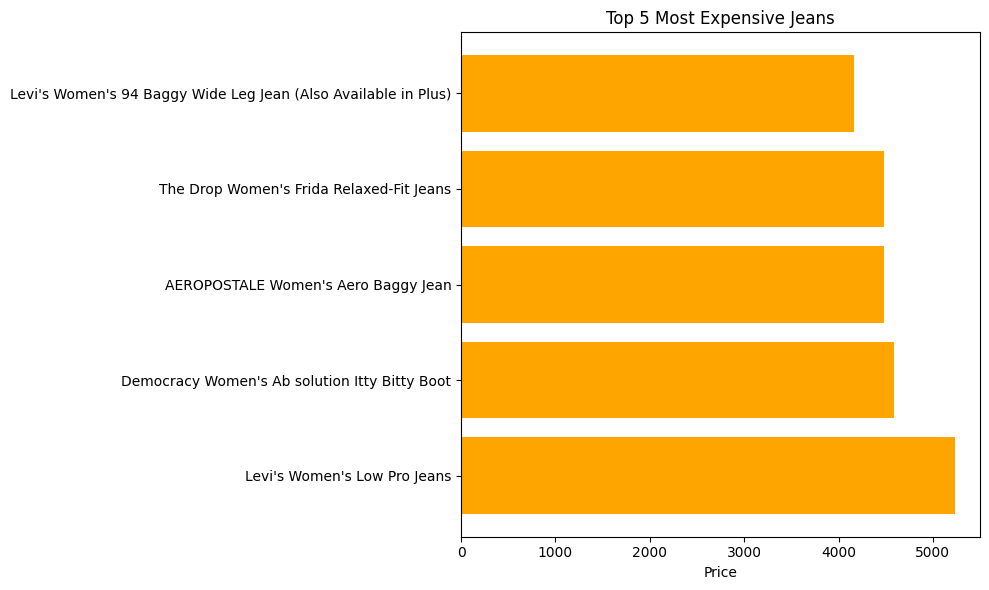

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Top 5 by Price
plt.barh(top_5_by_price['product_name'], top_5_by_price['price'], color='orange')
plt.xlabel('Price')
plt.title('Top 5 Most Expensive Jeans')

plt.tight_layout()
plt.show()

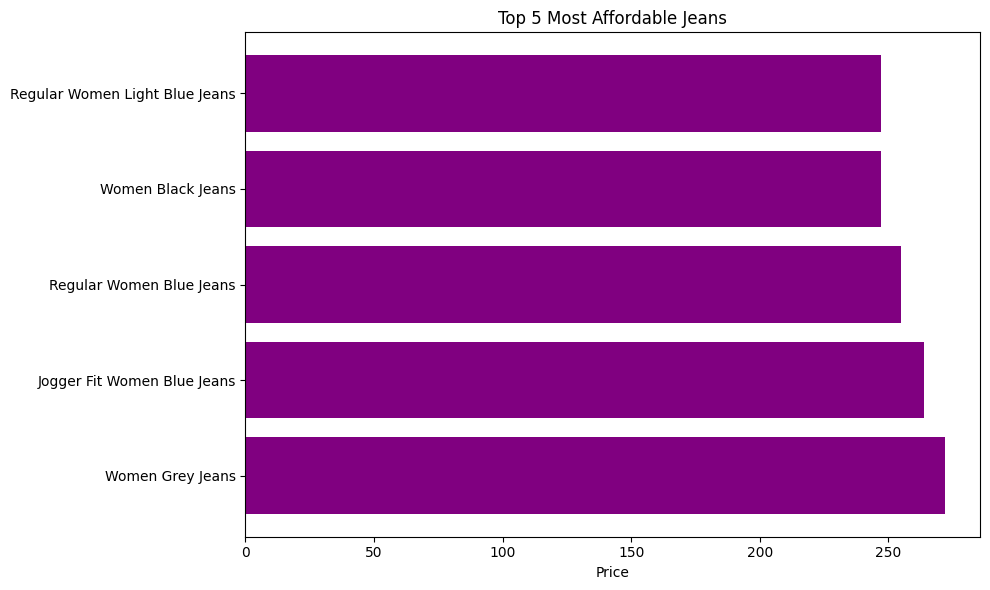

In [68]:
# Optionally, you can also look at the most affordable jeans
# Find top 5 most affordable jeans
bottom_5_by_price = df_sorted_by_price.tail(5)

plt.figure(figsize=(10, 6))

# Bottom 5 by Price
plt.barh(bottom_5_by_price['product_name'], bottom_5_by_price['price'], color='purple')
plt.xlabel('Price')
plt.title('Top 5 Most Affordable Jeans')

plt.tight_layout()
plt.show()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# Define your keywords
keywords = ['wide', 'mid','bootcut', 'straight','ripped','treggings', 'relaxed', 'jeggings','baggy','flared','stretchable','cargo', 'fit', 'high','rise', 'distressed', 'skinny']

# Initialize CountVectorizer with the predefined keywords
vectorizer = CountVectorizer(vocabulary=keywords)

# Transform the 'product_name' column to extract keyword counts
X = vectorizer.fit_transform(merged_df['product_name'])

# Create a DataFrame for keyword counts
keyword_counts = pd.DataFrame(X.toarray(), columns=keywords)

# Concatenate with the original DataFrame
df = pd.concat([merged_df, keyword_counts], axis=1)


In [78]:
# Create a new 'keywords' column with a list of all matching keywords
df['keywords'] = df[keywords].apply(lambda row: ', '.join([col for col in keywords if row[col] > 0]), axis=1)

# Now group by this new 'keywords' column
product_counts = df.groupby('keywords').size().reset_index(name='Count')

# Sort by count
product_counts = product_counts.sort_values(by='Count', ascending=False)


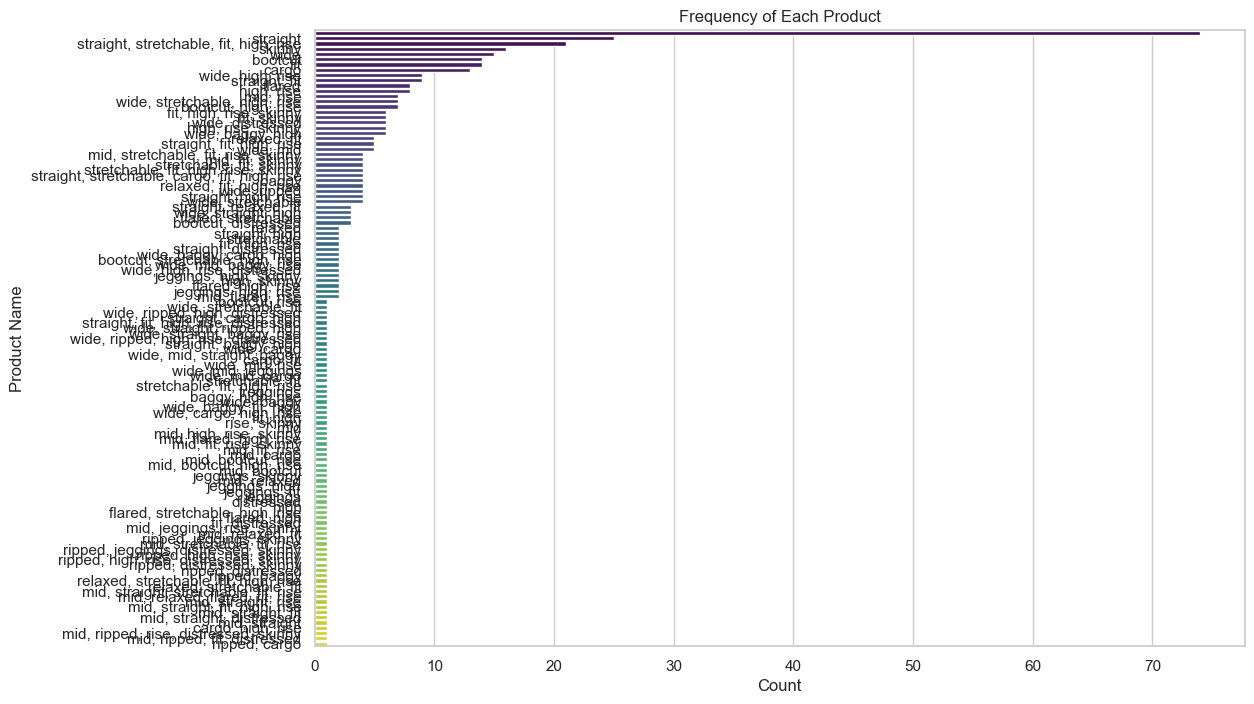

In [79]:
import seaborn as sns
# Count occurrences of each product
product_counts = df.groupby('keywords').size().reset_index(name='Count')
# Sort by count
product_counts = product_counts.sort_values(by='Count', ascending=False)
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='keywords', data=product_counts, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Frequency of Each Product')
plt.show()

In [87]:
# Define keywords to track
keywords = ['wide', 'mid','bootcut', 'straight','ripped','treggings', 'relaxed', 'jeggings','baggy','flared','stretchable','cargo', 'fit', 'high','rise', 'distressed', 'skinny']
# Initialize CountVectorizer
vectorizer = CountVectorizer(vocabulary=keywords)
X = vectorizer.fit_transform(merged_df['product_name'])
# Create a DataFrame for keyword counts
keyword_counts = pd.DataFrame(X.toarray(), columns=keywords)
df = pd.concat([merged_df, keyword_counts], axis=1)

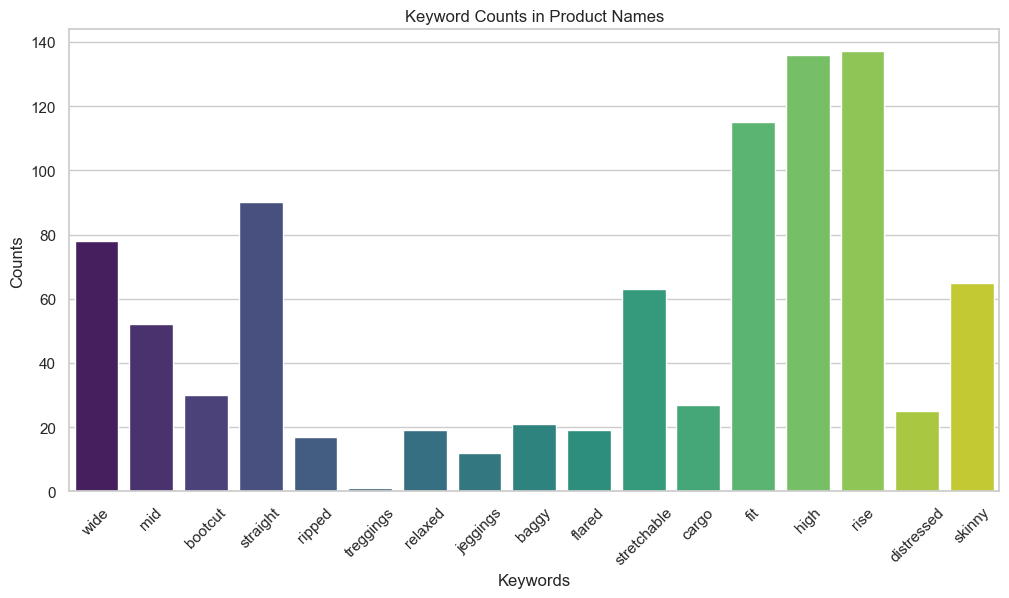

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")
# Sum the counts for each keyword
keyword_totals = df[keywords].sum()
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_totals.index, y=keyword_totals.values, palette="viridis")
plt.title("Keyword Counts in Product Names")
plt.xlabel("Keywords")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

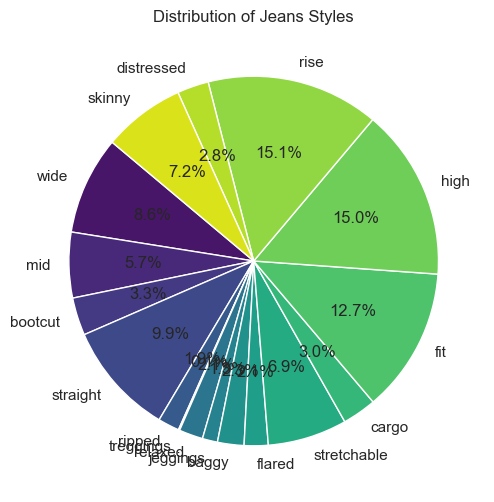

In [89]:
# Sample data: Summing up counts for each keyword to mimic 'style_counts'
style_counts = keyword_totals
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(style_counts)))
plt.title('Distribution of Jeans Styles')
plt.show()

In [82]:
# Define keywords to track
keywords = ['black', 'light','blue','grey','brown','green' ]
# Initialize CountVectorizer
vectorizer = CountVectorizer(vocabulary=keywords)
X = vectorizer.fit_transform(merged_df['product_name'])
# Create a DataFrame for keyword counts
keyword_counts = pd.DataFrame(X.toarray(), columns=keywords)
df = pd.concat([merged_df, keyword_counts], axis=1)

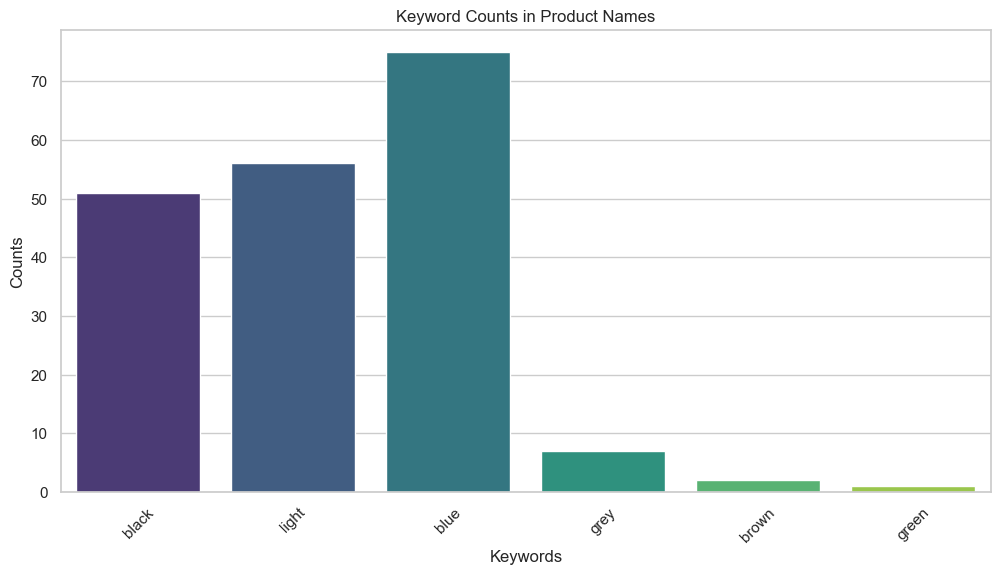

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")
# Sum the counts for each keyword
keyword_totals = df[keywords].sum()
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_totals.index, y=keyword_totals.values, palette="viridis")
plt.title("Keyword Counts in Product Names")
plt.xlabel("Keywords")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

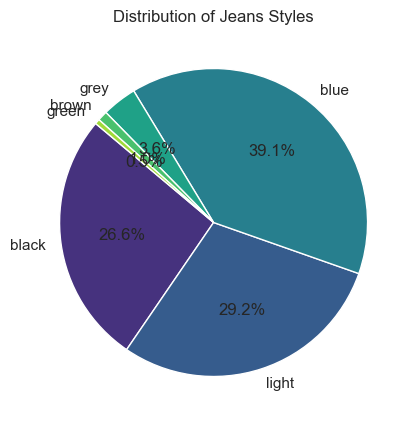

In [84]:
# Sample data: Summing up counts for each keyword to mimic 'style_counts'
style_counts = keyword_totals
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(style_counts)))
plt.title('Distribution of Jeans Styles')
plt.show()

In [90]:
print(df1[keywords].isnull().sum())

wide           1
mid            1
bootcut        1
straight       1
ripped         1
treggings      1
relaxed        1
jeggings       1
baggy          1
flared         1
stretchable    1
cargo          1
fit            1
high           1
rise           1
distressed     1
skinny         1
dtype: int64


In [ ]:
df1=df.dropna()

In [ ]:
# Fill missing values with 0 in the keyword data
df[keywords] = df[keywords].fillna(0)

In [132]:
# Drop rows with missing values in the keyword columns
df_clean = df1.dropna(subset=keywords)

# Ensure the keyword data has the same rows
keyword_counts_scaled_clean = scaler.fit_transform(df_clean[keywords])

# Check that the lengths match
print(len(df_clean), len(keyword_counts_scaled_clean))


437 437


In [131]:
# Apply KMeans with the aligned data
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df_clean['cluster'] = kmeans.fit_predict(keyword_counts_scaled_clean)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [133]:
# Fill missing values with 0 (assuming missing values mean absence of keyword)
df1[keywords] = df1[keywords].fillna(0)

# Standardize and perform clustering
keyword_counts_scaled = scaler.fit_transform(df1[keywords])
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df1['cluster'] = kmeans.fit_predict(keyword_counts_scaled)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3260\4234973928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[keywords] = df1[keywords].fillna(0)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3260\4234973928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [104]:
# Standardize the keyword counts using MinMaxScaler or StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
keyword_counts_scaled = scaler.fit_transform(df1[keywords])


In [105]:
# Verify that the number of rows matches between df and the scaled data
print(f"Length of df: {len(df1)}, Length of keyword_counts_scaled: {keyword_counts_scaled.shape[0]}")


Length of df: 438, Length of keyword_counts_scaled: 438


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

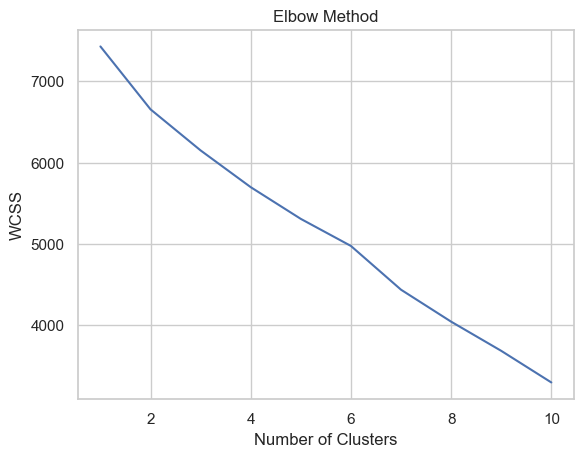

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,product_name,price,rating,reviews,wide,mid,bootcut,straight,ripped,treggings,...,baggy,flared,stretchable,cargo,fit,high,rise,distressed,skinny,cluster
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,2692.3834,4.2,1125.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,2842.7917,4.0,1419.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,Levi's Women's New Boyfriend Jeans (Also Avail...,2992.4517,4.2,9046.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,1373.1305,4.2,28264.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
4,Gloria Vanderbilt Women's Amanda Capri Jean,1870.0017,4.3,4770.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [125]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the keyword count data if needed
scaler = StandardScaler()
keyword_counts_scaled = scaler.fit_transform(keyword_counts)

# Use the elbow method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(keyword_counts_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the chosen number of clusters
n_clusters = 3  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df_clean['cluster'] = kmeans.fit_predict(keyword_counts_scaled)

# View the resulting clusters
df_clean.head()


In [ ]:
# Fill missing values with 0 in the keyword data
df[keywords] = df[keywords].fillna(0)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3260\1635800091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = kmeans.fit_predict(keyword_counts)


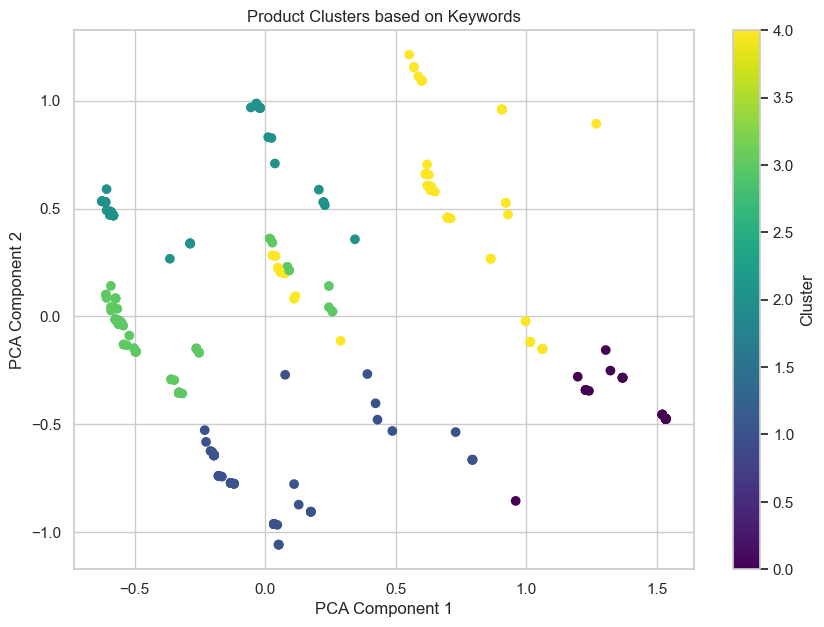

In [127]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Change n_clusters to your desired number
df1['cluster'] = kmeans.fit_predict(keyword_counts)

# Step 7: Reduce the dimensionality for visualization using PCA (optional but recommended)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(keyword_counts)

# Step 8: Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df1['cluster'], cmap='viridis')
plt.title("Product Clusters based on Keywords")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

Keyword counts per cluster:
         wide   mid  bootcut  straight  ripped  treggings  relaxed  jeggings  \
cluster                                                                        
0         2.0   2.0      3.0      24.0     0.0        0.0      1.0       0.0   
1         6.0  16.0      2.0      10.0     2.0        0.0      8.0       1.0   
2        38.0   8.0      4.0      11.0     4.0        0.0      0.0       1.0   
3        16.0   8.0     11.0      35.0     8.0        0.0      2.0       7.0   
4        16.0  18.0     10.0       9.0     3.0        1.0      8.0       3.0   

         baggy  flared  stretchable  cargo   fit  high  rise  distressed  \
cluster                                                                    
0          0.0     1.0         31.0    2.0  32.0  34.0  36.0         1.0   
1          0.0     5.0         10.0    2.0  30.0  16.0  23.0         3.0   
2         14.0     1.0          4.0    7.0   2.0  18.0   7.0         4.0   
3          7.0     7.0         

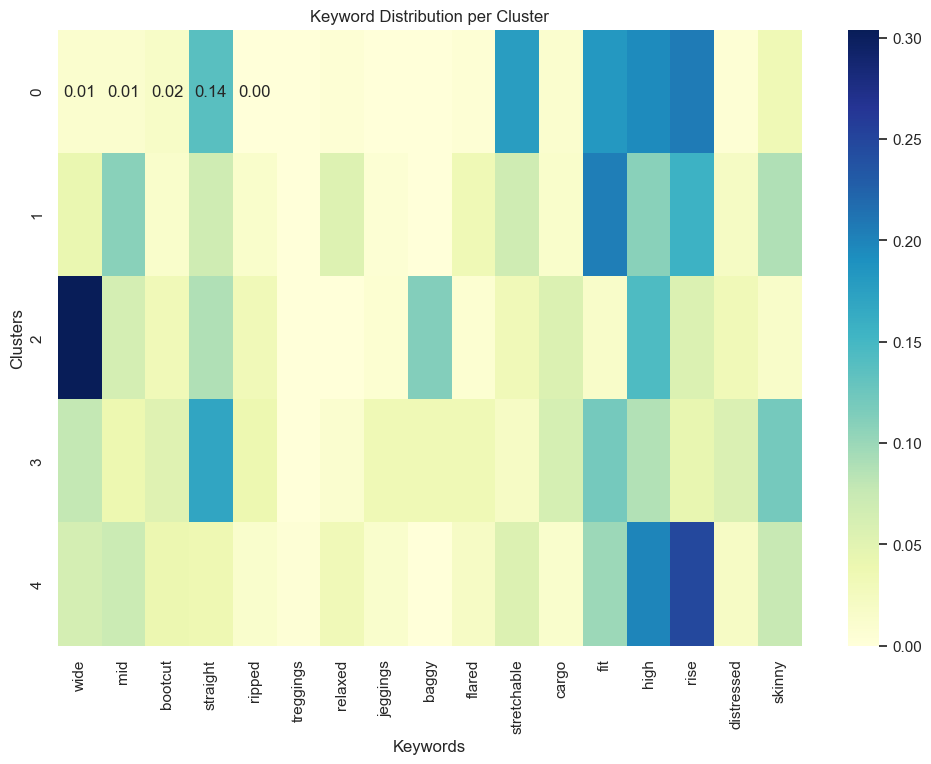

KeyError: 'Column not found: sales'

In [128]:
# Step 1: Analyze the keyword counts in each cluster
cluster_keyword_counts = df1.groupby('cluster')[keywords].sum()

print("Keyword counts per cluster:")
print(cluster_keyword_counts)

# Step 2: Identify which clusters have high frequencies for certain keywords
# This will help to identify the trending styles

# Optionally, normalize the keyword counts for better comparison across clusters
cluster_keyword_percentage = cluster_keyword_counts.div(cluster_keyword_counts.sum(axis=1), axis=0)

print("\nKeyword distribution per cluster (percentage):")
print(cluster_keyword_percentage)

# Step 3: Visualize keyword distribution across clusters
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_keyword_percentage, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Keyword Distribution per Cluster")
plt.xlabel("Keywords")
plt.ylabel("Clusters")
plt.show()




In [134]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/7c/2e/60e624bbe16f4baa45cb6e48a1ee05edd48a0a14cceec4d7eec9258755ac/streamlit-1.38.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<6,>=3.20 from https://files.pythonhosted.org/packages/28/ff/6af7b6fad3bd85820f00f3753a2ebd6bdd9dbf29da5a4252e9f402bdf

2024-09-16 23:11:03.794 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 23:11:04.284 
  command:

    streamlit run C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-16 23:11:04.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 23:11:04.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 23:11:04.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 23:11:05.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 23:11:05.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 23:11:05.911 Thread 'MainThread': mi

ValueError: Unknown format code 'd' for object of type 'float'

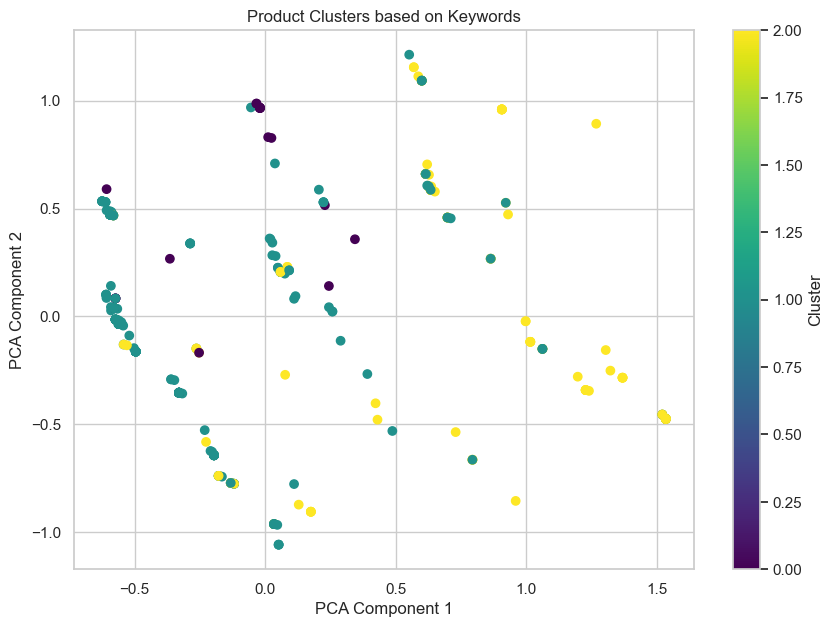

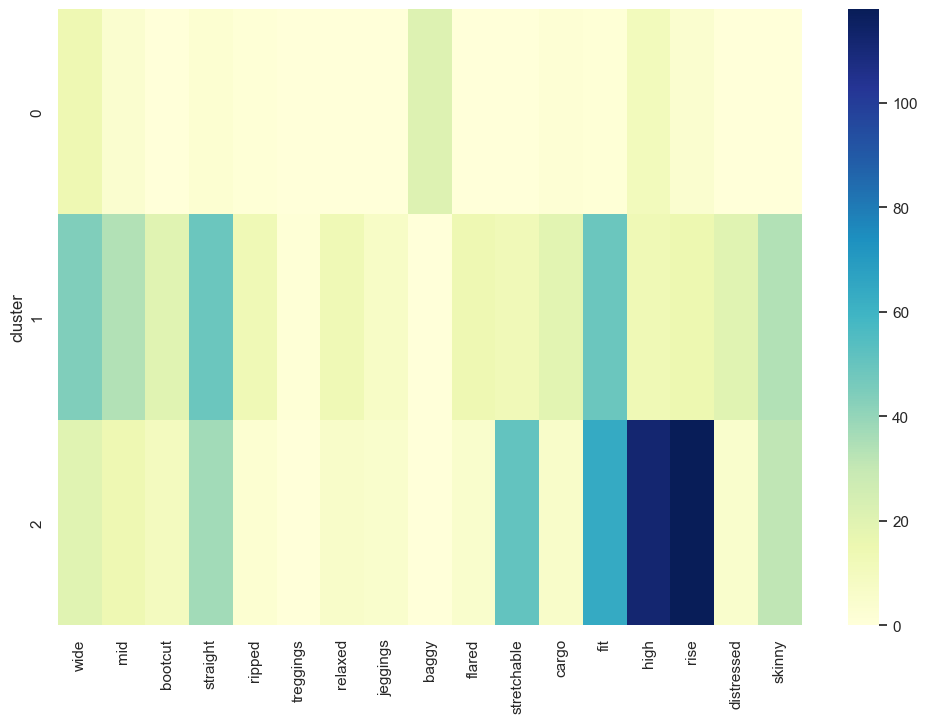

In [135]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

# Sample data (replace with your actual merged_df)
# For demo purposes, assuming merged_df is available with 'product_name' and 'sales'
# merged_df = pd.read_csv('your_data.csv')

# Define keywords


# Streamlit dashboard
st.title("Jeans Clustering and Trend Analysis Dashboard")

# Cluster Distribution
st.subheader("Cluster Distribution")
cluster_count = df1['cluster'].value_counts().reset_index()
st.bar_chart(cluster_count)

# Plot the clusters
st.subheader("Product Clusters based on Keywords")
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df1['cluster'], cmap='viridis')
plt.title("Product Clusters based on Keywords")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
st.pyplot(plt)

# Display keyword counts per cluster
st.subheader("Keyword Counts per Cluster")
cluster_keyword_counts = df1.groupby('cluster')[keywords].sum()

# Plot keyword heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_keyword_counts, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Keyword Distribution per Cluster")
st.pyplot(plt)

# Display sales data per cluster (Optional)
if 'sales' in df.columns:
    st.subheader("Sales Data by Cluster")
    cluster_sales = df.groupby('cluster')['sales'].sum()
    st.bar_chart(cluster_sales)

# Allow users to filter clusters
st.subheader("Filter by Cluster")
selected_cluster = st.selectbox("Select Cluster", df1['cluster'].unique())
filtered_data = df1[df1['cluster'] == selected_cluster]
st.write(filtered_data[['product_name', 'sales'] + keywords])
